<a href="https://colab.research.google.com/github/hurshd0/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [0]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [0]:
# Step 3 - verify we've got *something*
flag_data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,1.1,1.2,0.1,1.3,1.4,1.5,0.2,green,0.3,0.4,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black


In [0]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  45088      0 --:--:-- --:--:-- --:--:-- 45222
    194     194   15240


In [0]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
#help(pd.read_csv)

In [0]:
#?pd.read_csv

In [0]:
#??pd.read_csv

In [0]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [0]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

In [0]:
column_headers = ['name', 'landmass', 'zone', 'area', 'population', 'language', 
           'religion', 'bars', 'stripes', 'colors', 'red', 'green', 'blue', 
           'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 
           'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 
           'animate', 'text', 'topleft', 'botright']

flag_data = pd.read_csv(flag_data_url, names=column_headers)
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


## Loading from a local CSV to Google Colab

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# !ls /content/drive

# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

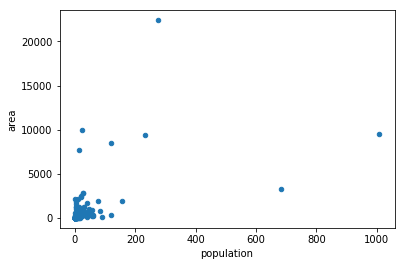

In [0]:
import matplotlib.pyplot as plt

# Scatter Plot
flag_data.plot.scatter('population', 'area');

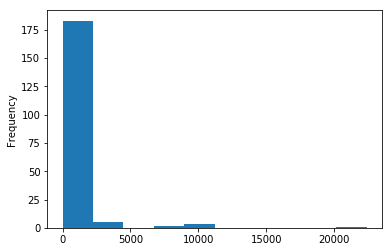

In [0]:
flag_data['area'].plot(kind='hist')

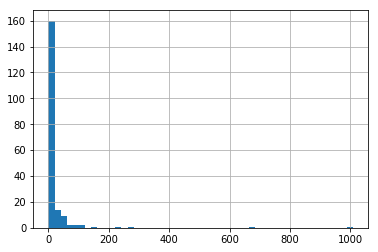

In [0]:
# Histogram
flag_data.population.hist(bins=50);

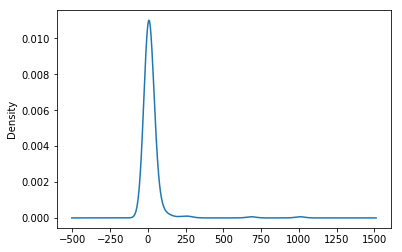

In [0]:
# Pandas Density Plot
flag_data.population.plot.density();

In [0]:
# # Seaborn Pairplot
# import seaborn as sns

# sns.set(style="ticks", color_codes=True)

# g = sns.pairplot(flag_data)

## Create the same basic Visualizations using Pandas

In [0]:
# Pandas Histogram - Look familiar?

In [0]:
# Pandas Scatterplot

In [0]:
# Pandas Scatter Matrix - Usually doesn't look too great.

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv')

df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values='?')
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
import numpy as np
df.replace("?", np.NaN, inplace=True)
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
country           32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Fill Missing Values

In [0]:
df.replace("?", np.NaN, inplace=True)
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# Auto-MPG

#### Description of fields in automobile price dataset.

Source: [UCI Machine Learning Repository - 1985 Auto Imports Dataset](https://archive.ics.uci.edu/ml/datasets/Automobile)

As per description this dataset has:

#### 1.  No. of instances: 205

#### 2. No. of attributes: 26 total

- 15 Continuous
- 1 Integer
- 10 nominal


#### DATA DICTIONARY
```
1. symboling:                -3, -2, -1, 0, 1, 2, 3
2. normalized-losses:        continuous from 65 to 256
3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                           isuzu, jaguar, mazda, mercedes-benz, mercury,
                           mitsubishi, nissan, peugot, plymouth, porsche,
                           renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type:                diesel, gas
5. aspiration:               std, turbo
6. num-of-doors:             four, two
7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels:             4wd, fwd, rwd
9. engine-location:          front, rear
10. wheel-base:               continuous from 86.6 120.9
11. length:                   continuous from 141.1 to 208.1
12. width:                    continuous from 60.3 to 72.3
13. height:                   continuous from 47.8 to 59.8
14. curb-weight:              continuous from 1488 to 4066
15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor
16. num-of-cylinders:         eight, five, four, six, three, twelve, two
17. engine-size:              continuous from 61 to 326
18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi
19. bore:                     continuous from 2.54 to 3.94
20. stroke:                   continuous from 2.07 to 4.17
21. compression-ratio:        continuous from 7 to 23
22. horsepower:               continuous from 48 to 288
23. peak-rpm:                 continuous from 4150 to 6600
24. city-mpg:                 continuous from 13 to 49
25. highway-mpg:              continuous from 16 to 54
26. price:                    continuous from 5118 to 45400
```

#### 3. Missing Attribute Values: (denoted by "?")

|Attribute #  | Number of instances missing a value |
|----------|---------------|
|normalized-losses | 41 |
|num-of-doors | 2 |
|bore | 4|
|stroke  | 4|
|horsepower  | 2|
|peak-rpm | 2|
|price | 4|

Source Information:
- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
- Date: 19 May 1987
- Sources:
 1) 1985 Model Import Car and Truck Specifications, 1985 Ward's
    Automotive Yearbook.
 2) Personal Auto Manuals, Insurance Services Office, 160 Water
    Street, New York, NY 10038 
 3) Insurance Collision Report, Insurance Institute for Highway
    Safety, Watergate 600, Washington, DC 20037

## Data loading and Cleaning

In [0]:
pd.set_option('display.max_columns', 80)
filepath = '../datasets/Automobile price data.csv'
new_filepath = 'https://raw.githubusercontent.com/hurshd0/DS-Unit-1-Sprint-1-Dealing-With-Data/master/datasets/Automobile%20price%20data.csv'
autompg = pd.read_csv(new_filepath)
autompg.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [0]:
autompg.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


All the numerical values checkout, and no missing values.

In [0]:
autompg.describe(include=['O'])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


> **Note** some of the values are numeical, but are treated as object, mainly due to them containing '?' missing values, for e.g., `bore`, `stroke`, `horsepower` etc..

So now let's find out which where misssing values with '?' in them.

In [0]:
missing_vals_dict = {}
for column in autompg.columns:
    missing_vals_dict[column] = autompg.loc[autompg[column] == '?', column].any()
missing_vals_dict

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


{'aspiration': False,
 'body-style': False,
 'bore': '?',
 'city-mpg': False,
 'compression-ratio': False,
 'curb-weight': False,
 'drive-wheels': False,
 'engine-location': False,
 'engine-size': False,
 'engine-type': False,
 'fuel-system': False,
 'fuel-type': False,
 'height': False,
 'highway-mpg': False,
 'horsepower': '?',
 'length': False,
 'make': False,
 'normalized-losses': '?',
 'num-of-cylinders': False,
 'num-of-doors': '?',
 'peak-rpm': '?',
 'price': '?',
 'stroke': '?',
 'symboling': False,
 'wheel-base': False,
 'width': False}

Missing values with `?` are:
- `normalize-losses`
- `num-of-doors`
- `bore`
- `stroke`
- `horsepower` 
- `peak-rpm` 
- `price`

So, let's drop the missing values instead of filling them with `NAN`, so it makes easy to plot them. 

In [0]:
autompg.replace("?", np.NaN, inplace=True)
autompg.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Now, we have exact count of those missing values encoded as `?` in the dataset. 

Next step, would be to drop them and convert the `object` data type columns to their actual data types we say before.

In [0]:
## Convert some columns to numeric values
numeric_cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
for column in numeric_cols:
    autompg[column] = pd.to_numeric(autompg[column])

In [0]:
autompg.dropna(axis = 0, inplace = True)
autompg.reset_index(drop=True, inplace = True)
autompg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
symboling            159 non-null int64
normalized-losses    159 non-null object
make                 159 non-null object
fuel-type            159 non-null object
aspiration           159 non-null object
num-of-doors         159 non-null object
body-style           159 non-null object
drive-wheels         159 non-null object
engine-location      159 non-null object
wheel-base           159 non-null float64
length               159 non-null float64
width                159 non-null float64
height               159 non-null float64
curb-weight          159 non-null int64
engine-type          159 non-null object
num-of-cylinders     159 non-null object
engine-size          159 non-null int64
fuel-system          159 non-null object
bore                 159 non-null float64
stroke               159 non-null float64
compression-ratio    159 non-null float64
horsepower           159 non-n

Now, the data types match the object description and

## Exploratory Data Visualization

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Scatter Plot

#### Scatter plots with Matplotlib

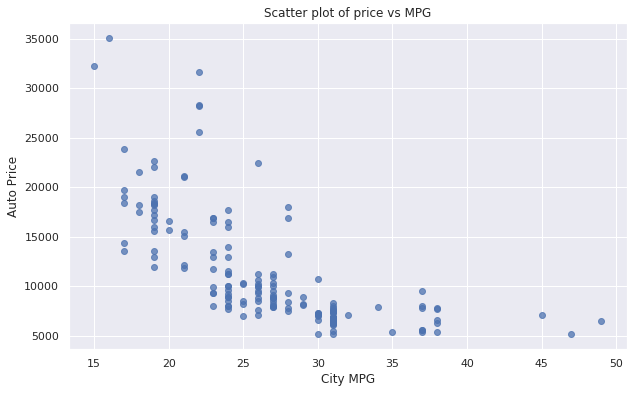

In [74]:
plt.figure(figsize=(10, 6)) # define plot area
plt.scatter('city-mpg', 'price', data=autompg, alpha=0.75)
plt.title('Scatter plot of price vs MPG') # Give the plot a main title
plt.xlabel('City MPG') # Set text for the x axis
plt.ylabel('Auto Price') # Set text for y axis
plt.show();

#### Scatter plots with Pandas

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


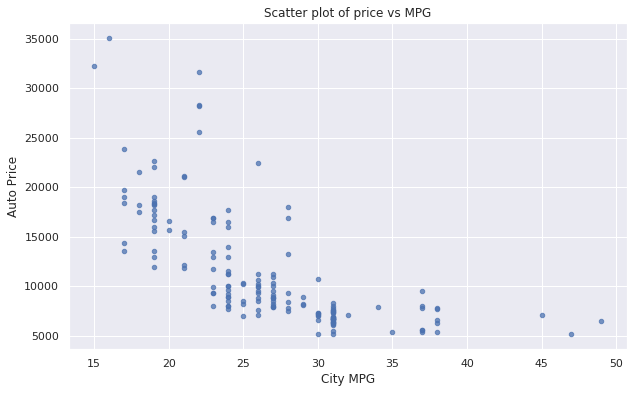

In [75]:
def my_scatterplot(df, title, xcol_name, ycol_name, xlabel, ylabel):
    fig = plt.figure(figsize=(10, 6)) # define plot area
    ax = fig.gca() # define axis                   
    df.plot(kind = 'scatter', x = xcol_name, y = ycol_name, ax = ax, alpha=0.75)
    ax.set_title(title) # Give the plot a main title
    ax.set_xlabel(xlabel) # Set text for the x axis
    ax.set_ylabel(ylabel); # Set text for y axis
    
my_scatterplot(autompg, title='Scatter plot of price vs MPG', xcol_name = 'city-mpg', ycol_name = 'price', xlabel = 'City MPG', ylabel = 'Auto Price')

#### Scatter plots with Seaborn

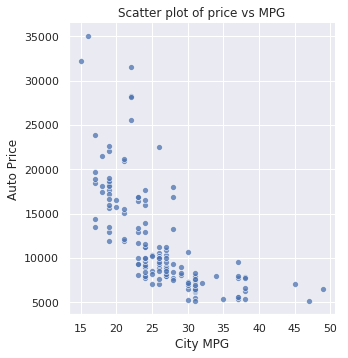

In [89]:
sns.relplot(x='city-mpg', y='price', data=autompg, alpha=0.75)
plt.title('Scatter plot of price vs MPG') # Give the plot a main title
plt.xlabel('City MPG') # Set text for the x axis
plt.ylabel('Auto Price') # Set text for y axis
plt.show();

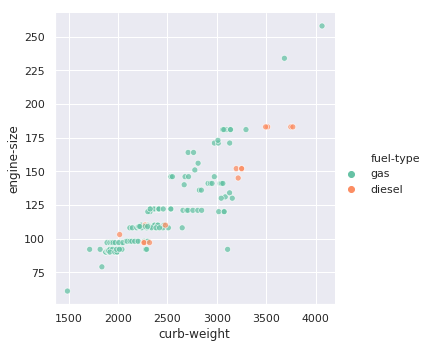

In [110]:
sns.relplot(x = 'curb-weight', y = 'engine-size', 
           data = autompg, 
           hue = "fuel-type", 
           palette="Set2", alpha=0.75,
           );   

### Histogram

#### Histogram with Matplotlib

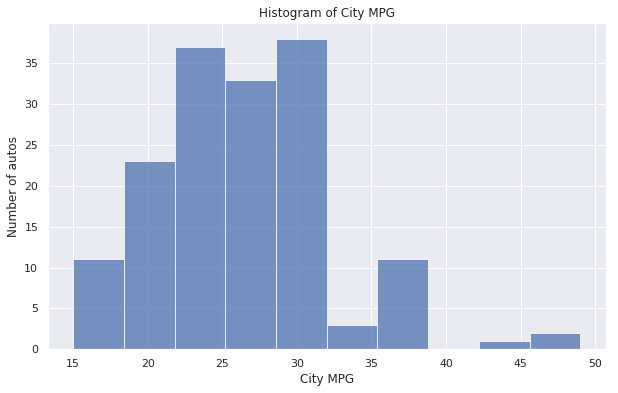

In [90]:
fig = plt.figure(figsize=(10, 6)) # define plot area
plt.hist(autompg['city-mpg'], alpha=0.75)
plt.xlabel('City MPG')
plt.ylabel('Number of autos')
plt.title('Histogram of City MPG');

#### Histogram with Pandas

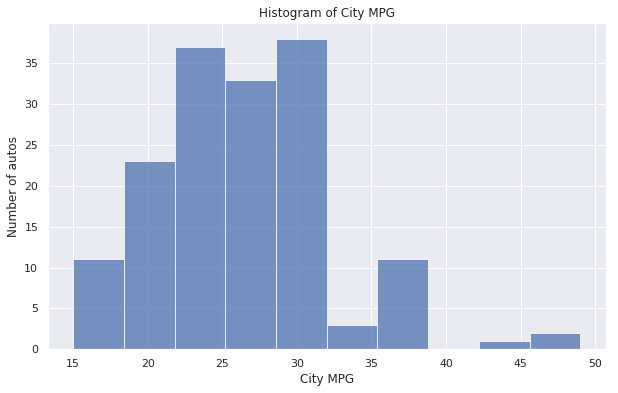

In [91]:
def my_hist(df, col_name, title=None, xlabel=None, ylabel='Count'):
    fig = plt.figure(figsize=(10, 6)) # define plot area
    ax = fig.gca() # define axis    
    df[col_name].plot.hist(ax = ax, alpha=0.75) # Use the plot.hist method on subset of the data frame
    if not title:
        title = 'Histogram of {}'.format(col_name)
    ax.set_title(title) # Give the plot a main title
    if not xlabel:
        xlabel = colname
    ax.set_xlabel(xlabel) # Set text for the x axis
    ax.set_ylabel(ylabel)# Set text for y axis
 
my_hist(autompg,'city-mpg', 'Histogram of City MPG', 'City MPG', 'Number of autos')

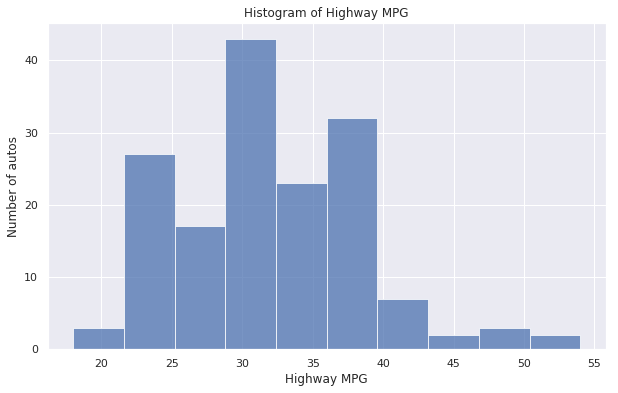

In [92]:
my_hist(autompg,'highway-mpg', 'Histogram of Highway MPG', 'Highway MPG', 'Number of autos')

#### Histogram with Seaborn

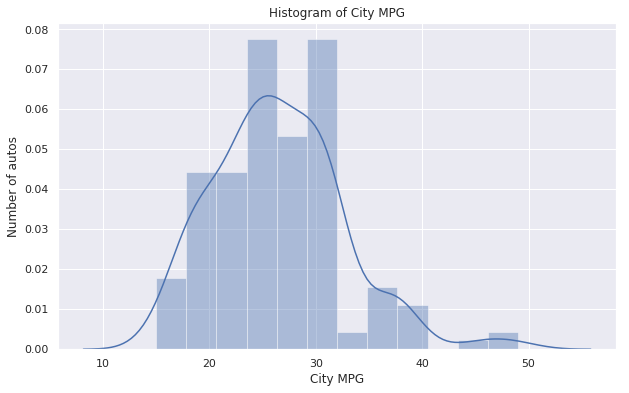

In [0]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
sns.distplot(autompg['city-mpg'], ax=ax)
plt.xlabel('City MPG')
plt.ylabel('Number of autos')
plt.title('Histogram of City MPG');

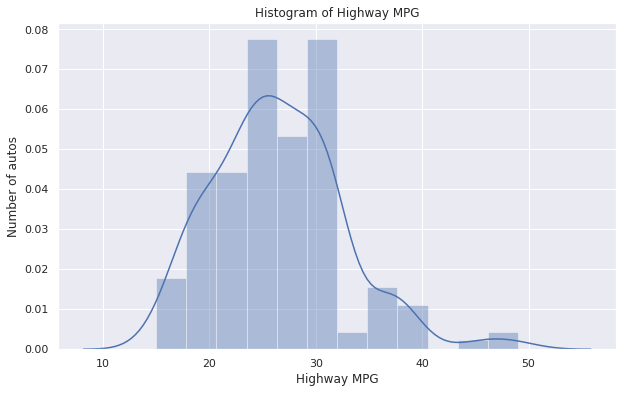

In [0]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
sns.distplot(autompg['city-mpg'], ax=ax)
plt.xlabel('Highway MPG')
plt.ylabel('Number of autos')
plt.title('Histogram of Highway MPG');

### Density Plot

#### Density plots with Pandas

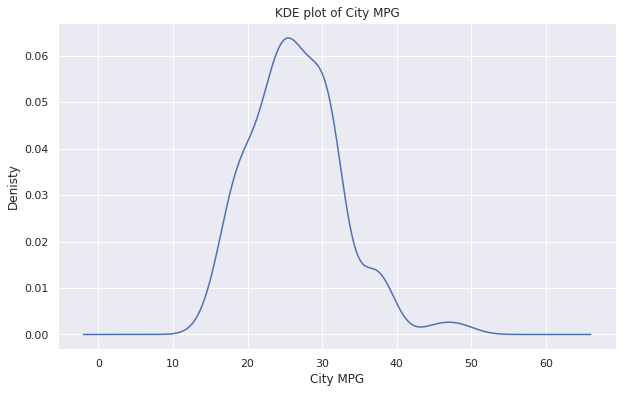

In [93]:
def my_density_plot(df, col_name, title=None, xlabel=None, ylabel='Denisty'):
    fig = plt.figure(figsize=(10, 6)) # define plot area
    ax = fig.add_subplot(111) # define axis 
    df[col_name].plot(kind='kde', ax=ax) 
    if not title:
        title = 'KDE plot of {}'.format(col_name)
    ax.set_title(title)
    if not xlabel:
        xlabel = col_name
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
my_density_plot(autompg, 'city-mpg', 'KDE plot of City MPG', 'City MPG')

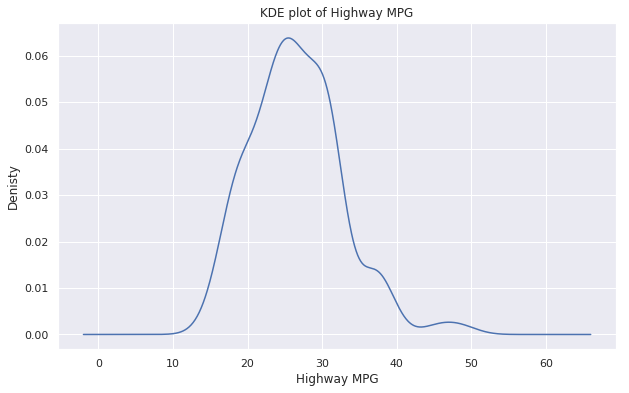

In [94]:
my_density_plot(autompg, 'city-mpg', 'KDE plot of Highway MPG', 'Highway MPG')

#### Density plots with Seaborn

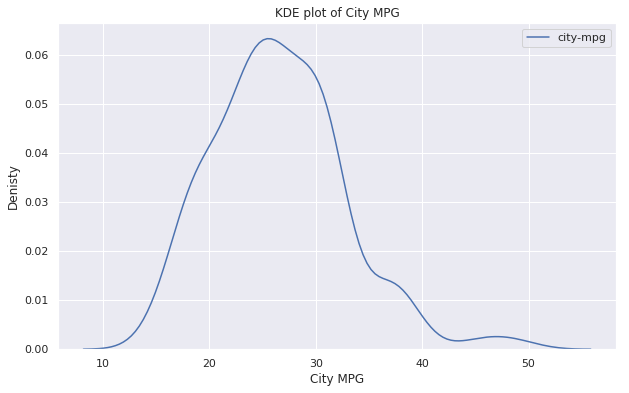

In [95]:
def my_density_plot(df, col_name, title=None, xlabel=None, ylabel='Denisty'):
    fig = plt.figure(figsize=(10, 6)) # define plot area
    ax = fig.add_subplot(111) # define axis 
    sns.kdeplot(df[col_name], ax = ax)
    if not title:
        title = 'KDE plot of {}'.format(col_name)
    ax.set_title(title)
    if not xlabel:
        xlabel = col_name
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
my_density_plot(autompg, 'city-mpg', 'KDE plot of City MPG', 'City MPG')

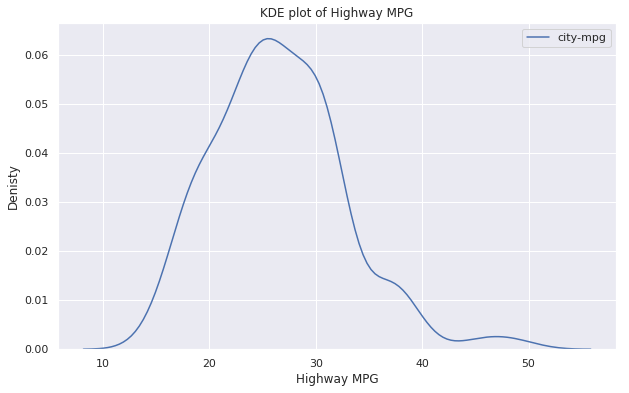

In [96]:
my_density_plot(autompg, 'city-mpg', 'KDE plot of Highway MPG', 'Highway MPG')

### Pair Plots

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


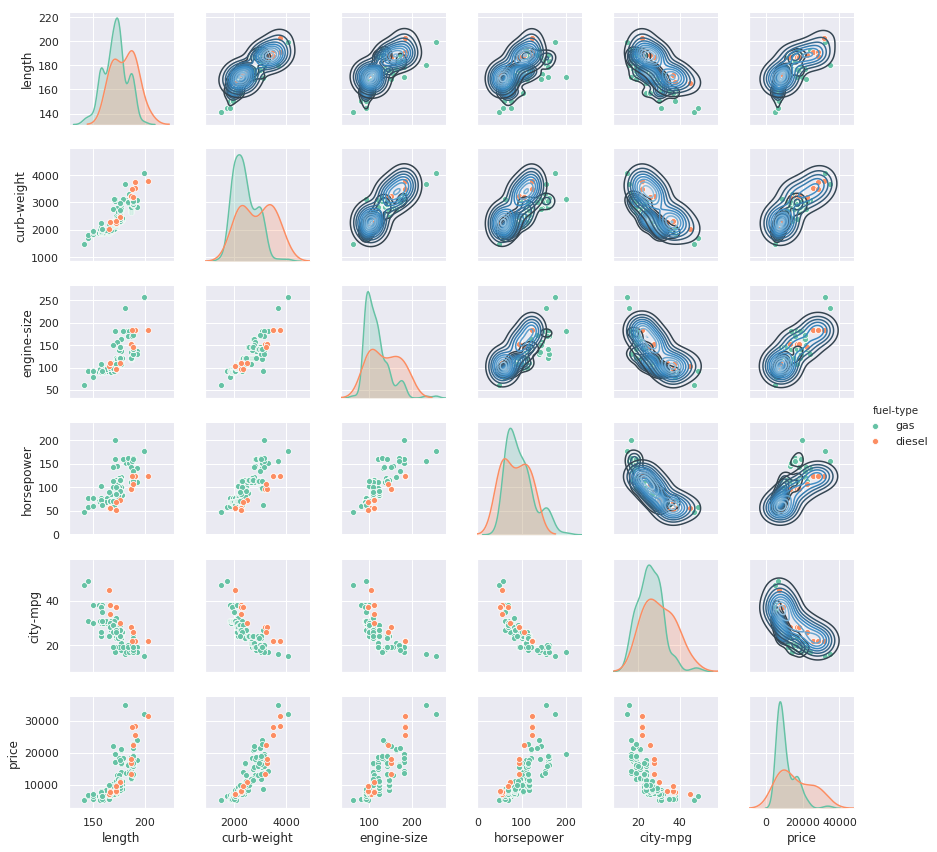

In [99]:
numerical_cols = ['length', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'price', 'fuel-type'] 
sns.pairplot(autompg[numerical_cols], hue='fuel-type', palette='Set2', diag_kind='kde', size=2).map_upper(sns.kdeplot, cmap='Blues_d')

### Correlation Heatmap

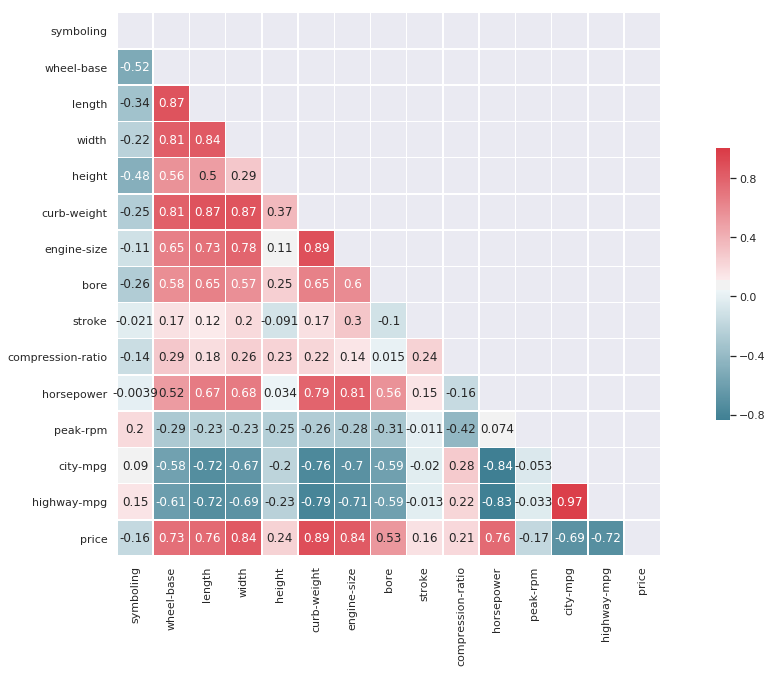

In [98]:
def correlation_heatmap(data=None, vmax=1, annot=True, corr_type='pearson'):
    if data is None:
        raise ValueError(
            "The parameter 'data' must be assigned a non-nil reference to a Pandas DataFrame")
    # Modified from the seaborn example at:
    # http://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Compute the correlation matrix
    corr = data.corr(corr_type)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    fig, axes = plt.subplots(figsize=(20, 10))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=vmax, annot=annot, square=True,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=axes)
    plt.show();
    
correlation_heatmap(autompg)

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.